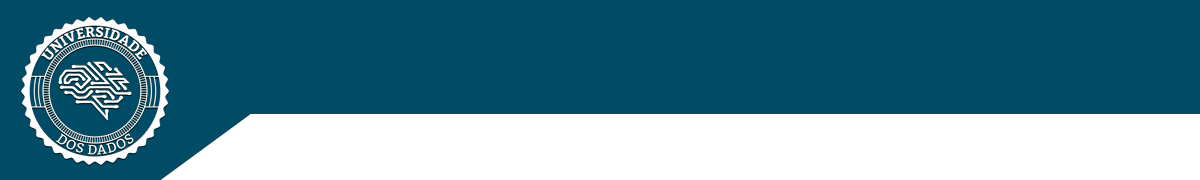
# Universidade dos Dados
GitHub: http://www.github.com/unidados/

Site de dicas: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

# Entendendo as RDDs

In [3]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [5]:
#Criação de uma RDD simples

rdd1 = sc.parallelize([1,2,3])
rdd1.collect()

[1, 2, 3]

In [6]:
#Utilizando o NumPy

import numpy as np
A = np.array(range(100))
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
rdd2 = sc.parallelize(np.array(range(100)))
rdd2.take(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
#Verificando a paralelização
#Observe que a paralelização da RDD não ocorreu. Ela não foi dividida.


rdd3 = sc.parallelize(np.array(range(100)))
print(rdd3.glom().collect())

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


# O particionamento das RDDs é feito por padrão pelo tamanho do cluster, mas também podemos especificar explicitamente, de preferência com o número de cores do PC.

In [15]:
#Paralelizando explicitamente

rdd = sc.parallelize(np.array(range(100)), 10)

In [16]:
#Verificando a paralelização

print(rdd.glom().collect())

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


In [17]:
print(rdd.getNumPartitions())

10


# Paralelizando arquivos

# 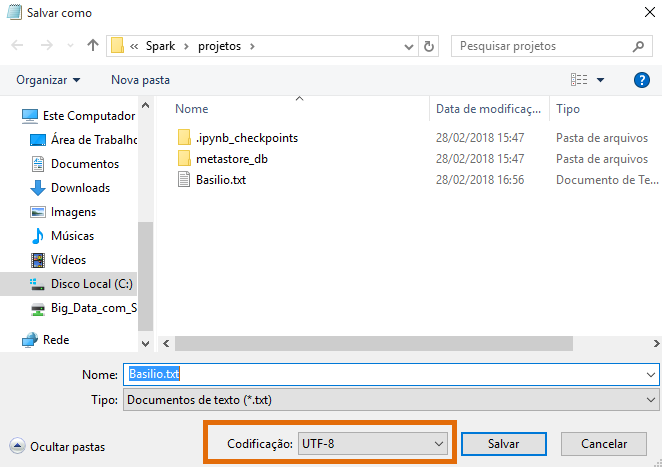

In [33]:
#Lendo O Primo Basilio - Eça de Queiroz

rdd = sc.textFile("Basilio.txt")

print(rdd.take(1000))

['The Project Gutenberg EBook of O Primo Bazilio, by José Maria Eça de Queirós', '', 'This eBook is for the use of anyone anywhere at no cost and with', 'almost no restrictions whatsoever.  You may copy it, give it away or', 're-use it under the terms of the Project Gutenberg License included', 'with this eBook or online at www.gutenberg.org', '', '', 'Title: O Primo Bazilio', '       Episodio Domestico', '', 'Author: José Maria Eça de Queirós', '', 'Release Date: June 13, 2013 [EBook #42942]', '', 'Language: Portuguese', '', '', '*** START OF THIS PROJECT GUTENBERG EBOOK O PRIMO BAZILIO ***', '', '', '', '', 'Produced by Rita Farinha, Alberto Manuel Brandão Simões', 'and the Online Distributed Proofreading Team at', 'http://www.pgdp.net (This file was produced from images', 'generously made available by National Library of Portugal', '(Biblioteca Nacional de Portugal).)', '', '', '', '', '', '    *Nota de editor:* Devido à existência de erros tipográficos neste', '    texto, foram tom

In [34]:
print(rdd.getNumPartitions())

1


In [35]:
rdd = sc.textFile("Basilio.txt", 100)

In [36]:
print(rdd.getNumPartitions())

100



# Leitura da Bíblia

In [68]:
#Verifique se o arquivo está em ANSI

rddANSI = sc.textFile("Biblia-ANSI.txt")

print(rddANSI.take(1000))

['B�BLIA SAGRADA', 'Tradu��o: Jo�o Ferreira de Almeida', 'Edi��o Revista e Corrigida', '�ndice', '', 'ANTIGO TESTAMENTO', 'G�nesis', '�xodo', 'Lev�tico', 'N�meros', 'Deuteron�mio', 'Josu�', 'Ju�zes', 'Rute', 'I Samuel', 'II Samuel', 'I Reis', 'II Reis', 'I Cr�nicas', 'II Cr�nicas', 'Esdras', 'Neemias', 'Ester', 'J�', 'Salmos', 'Prov�rbios', 'Eclesiastes', 'C�ntico dos C�nticos', 'Isa�as', 'Jeremias', 'Lamenta��es de Jeremias', 'Ezequiel', 'Daniel', 'Os�ias', 'Joel', 'Am�s', 'Obadias', 'Jonas', 'Miqu�ias', 'Naum', 'Habacuque', 'Sofonias', 'Ageu', 'Zacarias', 'Malaquias', 'NOVO TESTAMENTO', 'Mateus', 'Marcos', 'Lucas', 'Jo�o', 'Atos', 'Romanos', 'I Cor�ntios', 'II Cor�ntios', 'G�latas', 'Ef�sios', 'Filipenses', 'Colossenses', 'I Tessalonicenses', 'II Tessalonicenses', 'I Tim�teo', 'II Tim�teo', 'Tito', 'Filemom', 'Hebreus', 'Tiago', 'I Pedro', 'II Pedro', 'I Jo�o', 'II Jo�o', 'III Jo�o', 'Judas', 'Apocalipse', '', '', 'ANTIGO TESTAMENTO', '', 'G�NESIS', '', '�G�NESIS [1]', '1 No princ�pi

In [61]:
#Altere o arquivo para UTF-8

rdd = sc.textFile("Biblia-UTF8.txt")

print(rdd.take(1000))

['BÍBLIA SAGRADA', 'Tradução: João Ferreira de Almeida', 'Edição Revista e Corrigida', 'Índice', '', 'ANTIGO TESTAMENTO', 'Gênesis', 'Êxodo', 'Levítico', 'Números', 'Deuteronômio', 'Josué', 'Juízes', 'Rute', 'I Samuel', 'II Samuel', 'I Reis', 'II Reis', 'I Crônicas', 'II Crônicas', 'Esdras', 'Neemias', 'Ester', 'Jó', 'Salmos', 'Provérbios', 'Eclesiastes', 'Cântico dos Cânticos', 'Isaías', 'Jeremias', 'Lamentações de Jeremias', 'Ezequiel', 'Daniel', 'Oséias', 'Joel', 'Amós', 'Obadias', 'Jonas', 'Miquéias', 'Naum', 'Habacuque', 'Sofonias', 'Ageu', 'Zacarias', 'Malaquias', 'NOVO TESTAMENTO', 'Mateus', 'Marcos', 'Lucas', 'João', 'Atos', 'Romanos', 'I Coríntios', 'II Coríntios', 'Gálatas', 'Efésios', 'Filipenses', 'Colossenses', 'I Tessalonicenses', 'II Tessalonicenses', 'I Timóteo', 'II Timóteo', 'Tito', 'Filemom', 'Hebreus', 'Tiago', 'I Pedro', 'II Pedro', 'I João', 'II João', 'III João', 'Judas', 'Apocalipse', '', '', 'ANTIGO TESTAMENTO', '', 'GÊNESIS', '', '»GÊNESIS [1]', '1 No princípi

# Transformações

1 - São operações em um RDD que devolvem um novo

2 - Normalmente executam uma função anônima (lambda) sobre cada um dos elementos do RDD

3 - Operam sobre lazy

# Utilizando o Intersect

In [111]:
dados1 = sc.parallelize(["A","B","C","D","E"])
dados2 = sc.parallelize(["A","E","I","O","U"])

result = dados1.intersection(dados2)
result.take(10)

['A', 'E']

In [86]:
jose = rdd.filter(lambda linha: "José" in linha)

In [87]:
maria = rdd.filter(lambda linha: "Maria" in linha)

In [88]:
biblia = jose.intersection(maria)

# Ações

1 - São operações em um RDD que devolvem um novo

2 - Normalmente executam uma função anônima (lambda) sobre cada um dos elementos do RDD

3 - Operam sobre lazy

# Utilizando o takeSample

In [106]:
# TRUE - Possibilita elementos REPETIDOS
# Numero - Indica o tamanho da amostra

rdd = sc.parallelize(np.array(range(10)))
lines = rdd.count()
print("Número de linhas com José e Maria {0}".format(lines))
for l in rdd.takeSample(True,8):
    print(l)


Número de linhas com José e Maria 10
2
3
6
0
6
6
6
3


In [97]:
lines = biblia.count()
print("Número de linhas com José e Maria {0}".format(lines))
for l in biblia.takeSample(False,10):
    print(l)

Número de linhas com José e Maria 10
18 Ora, o nascimento de Jesus Cristo foi assim: Estando Maria, sua mãe, desposada com José, antes de se ajuntarem, ela se achou ter concebido do Espírito Santo.
16 e a Jacó nasceu José, marido de Maria, da qual nasceu JESUS, que se chama Cristo.
16 Foram, pois, a toda a pressa, e acharam Maria e José, e o menino deitado na manjedoura;
3 Não é este o carpinteiro, filho de Maria, irmão de Tiago, de José, de Judas e de Simão? e não estão aqui entre nós suas irmãs? E escandalizavam-se dele.
27 a uma virgem desposada com um varão cujo nome era José, da casa de Davi; e o nome da virgem era Maria.
47 E Maria Madalena e Maria, mãe de José, observavam onde fora posto.
56 entre as quais se achavam Maria Madalena, Maria, mãe de Tiago e de José, e a mãe dos filhos de Zebedeu.
20 E, projetando ele isso, eis que em sonho lhe apareceu um anjo do Senhor, dizendo: José, filho de Davi, não temas receber a Maria, tua mulher, pois o que nela se gerou é do Espírito Sant

In [91]:
for l in biblia.takeSample(False,20):
    print(l)

3 Não é este o carpinteiro, filho de Maria, irmão de Tiago, de José, de Judas e de Simão? e não estão aqui entre nós suas irmãs? E escandalizavam-se dele.
20 E, projetando ele isso, eis que em sonho lhe apareceu um anjo do Senhor, dizendo: José, filho de Davi, não temas receber a Maria, tua mulher, pois o que nela se gerou é do Espírito Santo;
16 Foram, pois, a toda a pressa, e acharam Maria e José, e o menino deitado na manjedoura;
47 E Maria Madalena e Maria, mãe de José, observavam onde fora posto.
27 a uma virgem desposada com um varão cujo nome era José, da casa de Davi; e o nome da virgem era Maria.
16 e a Jacó nasceu José, marido de Maria, da qual nasceu JESUS, que se chama Cristo.
56 entre as quais se achavam Maria Madalena, Maria, mãe de Tiago e de José, e a mãe dos filhos de Zebedeu.
40 Também ali estavam algumas mulheres olhando de longe, entre elas Maria Madalena, Maria, mãe de Tiago o Menor e de José, e Salomé;
55 Não é este o filho do carpinteiro? e não se chama sua mãe M